<h1 align=center face="verdana" style="color:#6699FF";font-family:verdana>Consumer Complaints Exploration</h1>
<div style="width:200px; background-color:white; height:120px;">
		<div style="width: 950px; height: 90px;">
			<img src="https://media.amazonwebservices.com/blog/2007/big_pbaws_logo_300px.jpg" width="150" height="61" alt="aws" />
			<img src="http://spark.apache.org/images/spark-logo-trademark.png" width="94" height="50" alt="spark" />
		</div>
	</div>
<h3 align=center>Meera Lakhavani</h3>
<h4 align=center>August 2016</h4>



**Goals:**
- Apply data science workflow to dataset using PySpark
- Generate insights by merging with other datasets and/or using NLP (such as TF-IDF)
- Understand and practice AWS setup and how to monitor/allocate computing resources properly

**Data:**
<br>Obtained from: http://catalog.data.gov/dataset<br>
From <u>Consumer Financial Protection Bureau</u> — "These are complaints we’ve received about financial products and services"

**Business Question to Answer:** <br>
<FONT 
style="BACKGROUND-COLOR: #A9F5F2">
What factors drive or predict financial complaints? <br>
What are consumers complaining about?</FONT> (Subsegment by product and company)

## <u> Contents:<u>

<OL>
<LI>Configure Spark Environment
<LI>Load Data
<LI>Explore Data

<LI>Clean Data
<LI>Visualize Data
<LI>Build Models
    <UL>
    <LI>NLP: Word2Vec and TF-IDF (term frequency inverse document frequency)
    <LI>Regression?
    </UL>
<LI>Model Validation
    <LI>?
    </UL> 
</OL>

<h2 style="color:#6699FF">Section 0 - Configure Spark Environment</h2>

- Import libraries &#10004;
- Understand how much data to process, and estimate computing resource required
- Set Spark configs to meet desired computing resource requirements

<h3 style="color:#6699FF">0.1 - Import Libraries</h3>

In [1]:
# Spark related libraries
from pyspark import SparkContext,SQLContext
from pyspark.sql.types import *
from pyspark.sql.window import Window
import pyspark.sql.functions as func
from pyspark.sql.functions import col, date_format, udf
from pyspark.sql import Row

# Python formats and others
import sys
import time
import boto3
from boto3.s3.transfer import S3Transfer
import datetime

# Data manipulation
% matplotlib inline
import json
import pandas as pd
import numpy as np
from sklearn import preprocessing
import math
import matplotlib.pyplot as plt

#import vincent

from pyspark import SparkContext
from pyspark.mllib.feature import HashingTF
from pyspark.mllib.feature import IDF

<h3 style="color:#6699FF">0.2 - Estimate Computing Resource</h3>
**TBC**

<h3 style="color:#6699FF">0.3 - Create and Set Spark Context</h3>
- Stop and create a new Spark context (Advanced - Optional)
- Show Current Spark Configurations
- Configure Spark Context
**TBC**

In [2]:
sc

In [2]:
# Here are a list of key parameters of Spark Context you can configure
print 'spark.dynamicAllocation.enabled: ', sc._conf.get('spark.app.name')
print 'spark.kryoserializer.buffer.max.mb: ', sc._conf.get('spark.kryoserializer.buffer.max.mb')
print 'spark.submit.deployMode:         ', sc._conf.get('spark.submit.deployMode')
print 'spark.executor.memory:           ', sc._conf.get('spark.executor.memory')
print 'spark.serializer:                ', sc._conf.get('spark.serializer')
print 'spark.executor.cores:            ', sc._conf.get('spark.executor.cores')
print 'spark.master:                    ', sc._conf.get('spark.master')
print 'spark.serializer:                ', sc._conf.get('spark.serializer')
print 'spark.dynamicAllocation.enabled: ', sc._conf.get('spark.dynamicAllocation.enabled')

spark.dynamicAllocation.enabled:  PySparkShell
spark.kryoserializer.buffer.max.mb:  None
spark.submit.deployMode:          client
spark.executor.memory:            5120M
spark.serializer:                 None
spark.executor.cores:             4
spark.master:                     yarn
spark.serializer:                 None
spark.dynamicAllocation.enabled:  true


<h2 style="color:#6699FF">Section 1 - Data Access & Storage</h2>

- Load data in csv format from AWS S3
- Datasets schema validation (Advanced)
- Datasets consolidation
- Save consolidated data in appropriate storage structure and format

<h3 style="color:#6699FF">1.1 - Load Data in CSV Format From AWS S3</h3>

<h4 style="color:#6699FF">Create HiveContext from SparkContext</h4>
In PySpark, sqlContext/hiveContext IS created automatically 

In [4]:
sqlContext

In [5]:
# Create a new sqlcontext (example)
from pyspark.sql import HiveContext
#hiveCtx = HiveContext(sc)

<h4 style="color:#6699FF">Load and save data using HiveContext and Databricks CSV Package</h4>

In [3]:
# input file directory, one single file
file_dir = 's3://consumer-complaint-data/Consumer_Complaints.csv'


# load one csv data file
df = (sqlContext.read
            .format('com.databricks.spark.csv')
            .options(header='true',inferSchema="true",delimiter=",") # csv library will infer schema automatically
            .load(file_dir))  # specify the file directory here
            #.cache()) # cache is optional, if you want to save data in memory

<h4 style="color:#6699FF">Explore Columns (schema)</h4>

In [7]:
df.printSchema()

root
 |-- Date received: string (nullable = true)
 |-- Product: string (nullable = true)
 |-- Sub-product: string (nullable = true)
 |-- Issue: string (nullable = true)
 |-- Sub-issue: string (nullable = true)
 |-- Consumer complaint narrative: string (nullable = true)
 |-- Company public response: string (nullable = true)
 |-- Company: string (nullable = true)
 |-- State: string (nullable = true)
 |-- ZIP code: string (nullable = true)
 |-- Tags: string (nullable = true)
 |-- Consumer consent provided?: string (nullable = true)
 |-- Submitted via: string (nullable = true)
 |-- Date sent to company: string (nullable = true)
 |-- Company response to consumer: string (nullable = true)
 |-- Timely response?: string (nullable = true)
 |-- Consumer disputed?: string (nullable = true)
 |-- Complaint ID: string (nullable = true)



In [8]:
# Print out the first 2 rows of the selected columns
df.select("Date received","Product","Issue").show(2)

+-------------+--------------------+--------------------+
|Date received|             Product|               Issue|
+-------------+--------------------+--------------------+
|   07/29/2013|       Consumer Loan|Managing the loan...|
|   07/29/2013|Bank account or s...|Using a debit or ...|
+-------------+--------------------+--------------------+
only showing top 2 rows



<h3 style="color:#6699FF">1.2 - Schema and Data Quality Validation</h3>
**TBC**
Complete playbook steps
<br>Note: my current data is all in one file (until I merge with other CapIQ or financial statement data) so I do not need a consistency check or consolidation at this time

<h2 style="color:#6699FF">Section 2 - Exploratory Data Analysis</h2>
- Descriptive statistics for data &#10004;
- Treatment of raw data (null values, outliers, etc)
- Basic EDA summary statistics and plots

<h3 style="color:#6699FF">2.1 Descriptive Statistics Summary</h3>
All columns are strings, so exploration of their distribution is the option as opposed to numerical statistics<br>
Conversion of strings to datetime to see time distribution is necessary

In [9]:
start = os.times()[-1]

# calculate summary statistics
df_desp_num = df.describe()

# print out the result
gap = 5
for i in range(0,len(df_desp_num.columns),gap):
    df_desp_num.select(df_desp_num.columns[i:(i+gap)]).show()
    
end = os.times()[-1]
print "Runtime: ", end - start , "s"

+-------+
|summary|
+-------+
|  count|
|   mean|
| stddev|
|    min|
|    max|
+-------+

Runtime:  0.120000001043 s


In [10]:
start = os.times()[-1]

col_name = "Company"

# Calculate histogram of string column
col_dist_company = ( df.groupby(col_name)                 # aggregate data by column value
                    .count()                           # count number of rows for each column value
                    .sort("count", ascending=False) )  # sort column value in the descending order

# print out distribution
col_dist_company.show()

end = os.times()[-1]
print "Runtime: ", end - start , "s"

+--------------------+-----+
|             Company|count|
+--------------------+-----+
|     Bank of America|56529|
|Wells Fargo & Com...|42597|
|                null|37747|
|             Equifax|34491|
|JPMorgan Chase & Co.|34471|
|            Experian|33137|
|TransUnion Interm...|27571|
|            Citibank|26793|
|               Ocwen|21005|
|         Capital One|15937|
| Nationstar Mortgage|13315|
| Synchrony Financial| 9751|
|        U.S. Bancorp| 9694|
|Ditech Financial LLC| 8950|
|Navient Solutions...| 8096|
|       PNC Bank N.A.| 7121|
|Encore Capital Group| 6372|
|HSBC North Americ...| 6252|
|                Amex| 5911|
|SunTrust Banks, Inc.| 4951|
+--------------------+-----+
only showing top 20 rows

Runtime:  6.76000000164 s


In [11]:
start = os.times()[-1]

col_name = "Company"
col_name_2 = "State"

# Calculate histogram of string column
col_dist_company_state = ( df.groupby(col_name, col_name_2)                 # aggregate data by column value
                    .count()                           # count number of rows for each column value
                    .sort("count", ascending=False) )  # sort column value in the descending order

# print out distribution
col_dist_company_state.show()

end = os.times()[-1]
print "Runtime: ", end - start , "s"

+--------------------+-----+-----+
|             Company|State|count|
+--------------------+-----+-----+
|                null| null|37747|
|     Bank of America|   CA|10851|
|Wells Fargo & Com...|   CA| 8167|
|     Bank of America|   FL| 6434|
|JPMorgan Chase & Co.|   CA| 6092|
|            Experian|   CA| 4790|
|Wells Fargo & Com...|   FL| 4587|
|            Experian|   TX| 4222|
|             Equifax|   CA| 4187|
|             Equifax|   TX| 3916|
|            Citibank|   CA| 3878|
|               Ocwen|   CA| 3823|
|             Equifax|   FL| 3719|
|JPMorgan Chase & Co.|   NY| 3717|
|TransUnion Interm...|   CA| 3442|
|TransUnion Interm...|   TX| 3423|
|     Bank of America|   NY| 3288|
|JPMorgan Chase & Co.|   FL| 3207|
|            Experian|   FL| 3204|
|            Citibank|   NY| 3046|
+--------------------+-----+-----+
only showing top 20 rows

Runtime:  5.16000000015 s


In [12]:
start = os.times()[-1]

col_name = "Product"

# Calculate histogram of string column
col_dist_product = ( df.groupby(col_name)                 # aggregate data by column value
                    .count()                           # count number of rows for each column value
                    .sort("count", ascending=False) )  # sort column value in the descending order

# print out distribution
col_dist_product.show()

end = os.times()[-1]
print "Runtime: ", end - start , "s"

+--------------------+------+
|             Product| count|
+--------------------+------+
|            Mortgage|193283|
|     Debt collection|107248|
|    Credit reporting|101259|
|         Credit card| 69961|
|Bank account or s...| 66711|
|       Consumer Loan| 22657|
|        Student loan| 16425|
|                null| 11200|
|               Inc."|  5235|
|         Payday loan|  4145|
|     Money transfers|  4072|
|        Prepaid card|  2638|
|          collection|  2056|
|            payments|  1940|
|                LLC"|  1485|
|         health club|  1445|
|             closing|   906|
|Other financial s...|   622|
|                Inc"|   446|
|                XXXX|   396|
+--------------------+------+
only showing top 20 rows

Runtime:  4.1099999994 s


In [13]:
start = os.times()[-1]

col_name = "Sub-product"

# Calculate histogram of string column
col_dist_sproduct = ( df.groupby(col_name)                 # aggregate data by column value
                    .count()                           # count number of rows for each column value
                    .sort("count", ascending=False) )  # sort column value in the descending order

# print out distribution
col_dist_sproduct.show()

end = os.times()[-1]
print "Runtime: ", end - start , "s"

+--------------------+------+
|         Sub-product| count|
+--------------------+------+
|                    |171524|
|      Other mortgage| 76490|
|Conventional fixe...| 59380|
|    Checking account| 47133|
|Other (i.e. phone...| 31703|
|       I do not know| 22674|
|         Credit card| 21955|
|Conventional adju...| 21652|
|        FHA mortgage| 20066|
|Non-federal stude...| 18661|
|                null| 18259|
|             Medical| 14362|
|        Vehicle loan| 13025|
|Other bank produc...| 12040|
|         Payday loan| 10148|
|Home equity loan ...|  9408|
|    Installment loan|  5821|
|     Savings account|  4141|
|         VA mortgage|  3987|
|            Mortgage|  3739|
+--------------------+------+
only showing top 20 rows

Runtime:  3.86000000313 s


In [14]:
start = os.times()[-1]

col_name = "Consumer complaint narrative"

# Calculate histogram of string column
col_dist_issue = ( df.groupby(col_name)                 # aggregate data by column value
                    .count()                           # count number of rows for each column value
                    .sort("count", ascending=False) )  # sort column value in the descending order

# print out distribution
col_dist_issue.show()

end = os.times()[-1]
print "Runtime: ", end - start , "s"

+----------------------------+------+
|Consumer complaint narrative| count|
+----------------------------+------+
|                            |510604|
|                        null| 27961|
|            Consent provided|  5693|
|        Consent not provided|  1439|
|        Company chooses n...|  1205|
|                         N/A|   648|
|        Company has respo...|   434|
|        Company believes ...|   414|
|        Closed with expla...|   171|
|                        XXXX|    88|
|        Company believes ...|    67|
|              Older American|    61|
|        "I am filing this...|    47|
|                       Other|    47|
|        This company cont...|    45|
|                   XXXX XXXX|    44|
|        Company believes ...|    34|
|               Servicemember|    32|
|        Closed with non-m...|    32|
|        "I am filing this...|    32|
+----------------------------+------+
only showing top 20 rows

Runtime:  37.0500000007 s


In [15]:
# Convert to Pandas dataframe so that we can generate plots
col_dist_company_pd = col_dist_company.toPandas()
col_dist_company_pd

,Company,count
0,Bank of America,56529
1,Wells Fargo & Company,42597
2,None,37747
3,Equifax,34491
4,JPMorgan Chase & Co.,34471
5,Experian,33137
6,"TransUnion Intermediate Holdings, Inc.",27571
7,Citibank,26793
8,Ocwen,21005
9,Capital One,15937


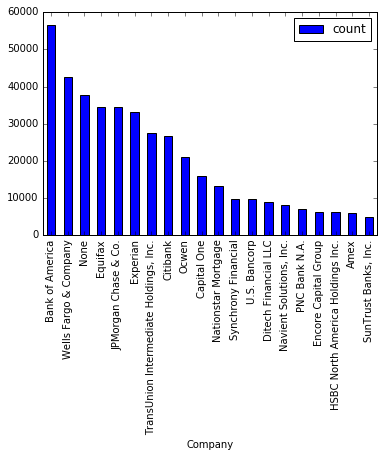

In [16]:
col_dist_head = col_dist_company_pd.head(20)
col_dist_head.plot(x='Company', y='count', kind='bar')

### Geographic exploration

In [17]:
start = os.times()[-1]

col_name = "State"

# Calculate histogram of string column
col_dist_state = ( df.groupby(col_name)                 # aggregate data by column value
                    .count()                           # count number of rows for each column value
                    .sort("count", ascending=False) )  # sort column value in the descending order

# print out distribution
col_dist_state.show()

end = os.times()[-1]
print "Runtime: ", end - start , "s"

+-----+-----+
|State|count|
+-----+-----+
|   CA|83854|
|   FL|55645|
|   TX|43148|
| null|40433|
|   NY|39611|
|   GA|25667|
|   NJ|23255|
|   PA|20620|
|   IL|20486|
|   VA|18687|
|   MD|18246|
|   OH|17824|
|   NC|15922|
|   MI|14838|
|   AZ|12660|
|   WA|11850|
|   MA|11335|
|   CO| 9842|
|   TN| 8792|
|   MO| 7430|
+-----+-----+
only showing top 20 rows

Runtime:  3.51000000164 s


In [18]:
# Convert to Pandas dataframe so that we can generate plots
col_dist_state_pd = col_dist_state.toPandas()
state_head = col_dist_state_pd.head(10)

In [19]:
# Data quality is awful
print(len(col_dist_state_pd))
col_dist_state_pd[100:120]

11917


,State,count
100,117XX,13
101,921XX,12
102,2016,12
103,336XX,12
104,328XX,12
105,330XX,12
106,207XX,12
107,200XX,12
108,850XX,11
109,080XX,11


In [20]:
desired_states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA," 
                  "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
                  "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", 
                  "VA", "WA", "WV", "WI", "WY"]

In [21]:
'''
import simplemapplot

example_colors = ["#FC8D59","#FFFFBF","#99D594"]
country_value = {"us":1, "au":2, "gb":0}
make_world_country_map(data=country_value, colors=example_colors)
'''

'\nimport simplemapplot\n\nexample_colors = ["#FC8D59","#FFFFBF","#99D594"]\ncountry_value = {"us":1, "au":2, "gb":0}\nmake_world_country_map(data=country_value, colors=example_colors)\n'

In [22]:
states3 = col_dist_state_pd[col_dist_state_pd['State'].isin(desired_states)]
#col_dist_state_pd["State"] = desired_states

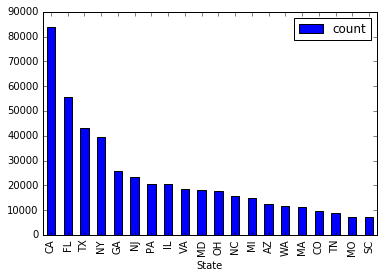

In [23]:
states_head = states3.head(20)
states_head.plot(x='State', y='count', kind='bar')

In [24]:
'''import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon

# create the map
map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
map.readshapefile('st99_d00', name='states', drawbounds=True)

# collect the state names from the shapefile attributes so we can
# look up the shape obect for a state by it's name
state_names = []
for shape_dict in map.states_info:
    state_names.append(shape_dict['NAME'])

ax = plt.gca() # get current axes instance

# get Texas and draw the filled polygon
seg = map.states[state_names.index('Texas')]
poly = Polygon(seg, facecolor='red',edgecolor='red')
ax.add_patch(poly)

plt.show()
'''

"import matplotlib.pyplot as plt\nfrom mpl_toolkits.basemap import Basemap\nfrom matplotlib.patches import Polygon\n\n# create the map\nmap = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,\n        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)\n\n# load the shapefile, use the name 'states'\nmap.readshapefile('st99_d00', name='states', drawbounds=True)\n\n# collect the state names from the shapefile attributes so we can\n# look up the shape obect for a state by it's name\nstate_names = []\nfor shape_dict in map.states_info:\n    state_names.append(shape_dict['NAME'])\n\nax = plt.gca() # get current axes instance\n\n# get Texas and draw the filled polygon\nseg = map.states[state_names.index('Texas')]\npoly = Polygon(seg, facecolor='red',edgecolor='red')\nax.add_patch(poly)\n\nplt.show()\n"

In [25]:
'''

#Swap county data for state data, reset map
import vincent
vis = vincent.Map

#vis = vincent.Map(width=1000, height=800)
#Add the US county data and a new line color
vis.geo_data(projection='albersUsa', scale=1000, counties=county_geo)
vis + ('2B4ECF', 'marks', 0, 'properties', 'enter', 'stroke', 'value')

#Add the state data, remove the fill, write Vega spec output to JSON
vis.geo_data(states=state_geo)
vis - ('fill', 'marks', 1, 'properties', 'enter')
vis.to_json(path)

'''
vis.tabular_data(col_dist_state_pd, columns=['State', 'count'])
vis.geo_data(bind_data='data.id', reset=True, states=state_geo)
vis.update_map(scale=1000, projection='albersUsa')
vis + (['#c9cedb', '#0b0d11'], 'scales', 0, 'range')
vis.to_json(path)'''

'''

SyntaxError: invalid syntax (<ipython-input-25-233ef7eb7eaf>, line 24)

<h2 style="color:#6699FF">Timestamp Conversion in Progress</h4>

In [16]:
df.select("Date received").show(10)

+-------------+
|Date received|
+-------------+
|   07/29/2013|
|   07/29/2013|
|   07/29/2013|
|   07/29/2013|
|   07/29/2013|
|   07/29/2013|
|   07/29/2013|
|   07/29/2013|
|   07/29/2013|
|   07/29/2013|
+-------------+
only showing top 10 rows



In [12]:
start = os.times()[-1]

col_name = "Date received"

# Calculate histogram of string column
col_dist_date = ( df.groupby(col_name)                 # aggregate data by column value
                    .count()                           # count number of rows for each column value
                    .sort("count", ascending=False) )  # sort column value in the descending order

# print out distribution
col_dist_date.show()

end = os.times()[-1]
print "Runtime: ", end - start , "s"

+--------------------+-----+
|       Date received|count|
+--------------------+-----+
|          06/26/2014|  916|
|          07/06/2016|  875|
|          08/27/2015|  874|
|          08/26/2015|  833|
|          07/13/2016|  785|
|          08/12/2015|  761|
|          05/11/2016|  759|
|          05/25/2016|  748|
|          07/08/2015|  746|
|",Company chooses...|  740|
|          05/03/2016|  718|
|          06/28/2016|  706|
|          06/08/2016|  706|
|          03/26/2014|  704|
|          04/23/2014|  702|
|          06/29/2016|  700|
|          07/07/2016|  700|
|          05/10/2016|  699|
|          04/12/2016|  697|
|          10/14/2015|  696|
+--------------------+-----+
only showing top 20 rows

Runtime:  19.6199999973 s


In [13]:
col_dist_date_pd = col_dist_date.toPandas()

In [14]:
col_dist_date_pd

,Date received,count
0,06/26/2014,916
1,07/06/2016,875
2,08/27/2015,874
3,08/26/2015,833
4,07/13/2016,785
5,08/12/2015,761
6,05/11/2016,759
7,05/25/2016,748
8,07/08/2015,746
9,""",Company chooses not to provide a public resp...",740


In [15]:
mask = (col_dist_date_pd['Date received'].str.len() == 10)
col_dist_date_pd = col_dist_date_pd.loc[mask]

In [17]:
#col_dist_date_pd = col_dist_date_pd(encoding ='utf-8')
for row in col_dist_date_pd:
    return row['Date received'] == row['Date received'].encode('ascii', 'ignore').decode('ascii')
#yourstring = yourstring.encode('ascii', 'ignore').decode('ascii')
#col_dist_date_pd['Date received'] = col_dist_date_pd['Date received'].astype(str).str.split(',')

SyntaxError: 'return' outside function (<ipython-input-17-f4fc7fca4a3d>, line 3)

In [18]:
#for row in col_dist_date_pd:
#if col_dist_date_pd['Date received'].astype(str).str[2]=="/":
#    new_date_count.apppend(i)

#col_dist_date_pd['Date received'].astype(str).str[2:].str.contains('/')

new_date_count = col_dist_date_pd[col_dist_date_pd['Date received'].astype(str).str[2:].str.contains('/')]
#new_date_count = col_dist_date_pd[col_dist_date_pd['Date received'].astype(str).str[5:].str.contains('/')]
new_date_count = new_date_count[new_date_count['Date received'].astype(str).str.contains("X")== False]
new_date_count
#slash_index = col_dist_date_pd['Date received'].str[2]
#slash_index
# 1714

,Date received,count
0,06/26/2014,916
1,07/06/2016,875
2,08/27/2015,874
3,08/26/2015,833
4,07/13/2016,785
5,08/12/2015,761
6,05/11/2016,759
7,05/25/2016,748
8,07/08/2015,746
10,05/03/2016,718


In [19]:
new_date_count['Date received'] =  pd.to_datetime(new_date_count['Date received'], format='%m/%d/%y')

#new_date_count[new_date_count.Date received.str.contains("X") == False]

#new_date_count = col_dist_date_pd[col_dist_date_pd['Date received'].astype(str).str[2:].str.contains('/')]

ValueError: unconverted data remains: 14

###### Count number of rows
start = os.times()[-1]

count_rows = df.count()
print "total number of rows: ", count_rows

end = os.times()[-1]
print "Runtime: ", end - start , "s"

<h4 style="color:#6699FF">Understand Missing Values</h4>

In [13]:
# Count number of NA columns by company

start = os.times()[-1]

# select column
col_name = 'Company'

# count null value
count_null = df.where(df[col_name].isNull()).count() 

print "Total Null value count in column ", col_name, " is: ", count_null

end = os.times()[-1]
print "Runtime: ", end - start , "s"

Total Null value count in column  Company  is:  37747
Runtime:  2.87000000104 s


In [14]:
start = os.times()[-1]

# select column
col_name = 'Issue'

# list of unique values in dataframe format
df_col_unique_value = df.select(col_name).distinct()

# print out unique value table
df_col_unique_value.show()

# collect the list from the dataframe
list_col_unique_value = df_col_unique_value.collect()

# reformat: extract the value from the list
list_col_unique_value = [value[0] for value in list_col_unique_value]

# convert from list into pandas dataframe
pd_col_unique_value = pd.DataFrame({ col_name : df.columns})

'''# save the list in the csv format
file_dir = col_name + ".csv"
pd_col_unique_value.to_csv("taxi_summary.csv")
print "Unique list of column ", col_name, " is now saved in the csv file in directory: ", file_dir'''

# count the number of unique value
count_unique = len(list_col_unique_value)

print "Number of unique value in column ", col_name, " is: ", count_unique

end = os.times()[-1]
print "Runtime: ", end - start , "s"

+--------------------+
|               Issue|
+--------------------+
|Communication tac...|
|               921XX|
| now I know I pai...|
| I have years of ...|
| only a filing of...|
| even after I inf...|
| including Truth ...|
| there were no in...|
| I will be at ris...|
|               75007|
|               068XX|
| the name of thei...|
| the only change ...|
| not later than 9...|
| this has left us...|
| and other inform...|
| and does n't pro...|
| as there are XXX...|
| as if I were res...|
|               97128|
+--------------------+
only showing top 20 rows

Number of unique value in column  Issue  is:  11737
Runtime:  7.6799999997 s


### Word2Vec experiment

In [97]:
from pyspark.mllib.util import MLUtils
from pyspark.mllib.linalg import Vectors
from pyspark.mllib.feature import StandardScaler

In [56]:
# spark-nltk.py
from pyspark import SparkConf
from pyspark import SparkContext

"""conf = SparkConf()
conf.setMaster('yarn-client')
conf.setAppName('spark-nltk')
sc = SparkContext(conf=conf)"""

data = sc.textFile('file:///usr/share/nltk_data/corpora/state_union/1972-Nixon.txt')

def word_tokenize(x):
    import nltk
    return nltk.word_tokenize(x)

def pos_tag(x):
    import nltk
    return nltk.pos_tag([x])

words = data.flatMap(word_tokenize)
print words.take(10)

pos_word = words.map(pos_tag)
print pos_word.take(5)

Py4JJavaError: An error occurred while calling o83.partitions.
: org.apache.hadoop.mapred.InvalidInputException: Input path does not exist: file:/usr/share/nltk_data/corpora/state_union/1972-Nixon.txt
	at org.apache.hadoop.mapred.FileInputFormat.singleThreadedListStatus(FileInputFormat.java:253)
	at org.apache.hadoop.mapred.FileInputFormat.listStatus(FileInputFormat.java:201)
	at org.apache.hadoop.mapred.FileInputFormat.getSplits(FileInputFormat.java:281)
	at org.apache.spark.rdd.HadoopRDD.getPartitions(HadoopRDD.scala:200)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:248)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:246)
	at scala.Option.getOrElse(Option.scala:121)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:246)
	at org.apache.spark.rdd.MapPartitionsRDD.getPartitions(MapPartitionsRDD.scala:35)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:248)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:246)
	at scala.Option.getOrElse(Option.scala:121)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:246)
	at org.apache.spark.api.java.JavaRDDLike$class.partitions(JavaRDDLike.scala:60)
	at org.apache.spark.api.java.AbstractJavaRDDLike.partitions(JavaRDDLike.scala:45)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:237)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:128)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:211)
	at java.lang.Thread.run(Thread.java:745)


In [98]:
data = nlp_df
#data = MLUtils.loadLibSVMFile(sc, "data/mllib/sample_libsvm_data.txt")
label = data.map(lambda x: x.label)
features = data.map(lambda x: x.features)

scaler1 = StandardScaler().fit(features)
scaler2 = StandardScaler(withMean=True, withStd=True).fit(features)

# data1 will be unit variance.
data1 = label.zip(scaler1.transform(features))

# Without converting the features into dense vectors, transformation with zero mean will raise
# exception on sparse vector.
# data2 will be unit variance and zero mean.
data2 = label.zip(scaler1.transform(features.map(lambda x: Vectors.dense(x.toArray()))))

AttributeError: 'DataFrame' object has no attribute 'map'

In [94]:
from pyspark import SparkContext
from pyspark.mllib.feature import Word2Vec

In [96]:
sc2 = SparkContext(appName='Word2Vec')
#inp = sc2.textFile("text8_lines").map(lambda row: row.split(" "))

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=PySparkShell, master=yarn) created by <module> at /usr/local/lib/python2.7/site-packages/IPython/utils/py3compat.py:289 

In [ ]:


word2vec = Word2Vec()
model = word2vec.fit(inp)

synonyms = model.findSynonyms('china', 40)

for word, cosine_distance in synonyms:
    print "{}: {}".format(word, cosine_distance)

### TF-IDF Experimentation

In [9]:
start = os.times()[-1]

col_name = "Consumer complaint narrative"

# Calculate histogram of string column
col_dist_complaints = ( df.groupby(col_name)                 # aggregate data by column value
                    .count()                           # count number of rows for each column value
                    .sort("count", ascending=False) )  # sort column value in the descending order

# print out distribution
col_dist_complaints.show()

end = os.times()[-1]
print "Runtime: ", end - start , "s"

+----------------------------+------+
|Consumer complaint narrative| count|
+----------------------------+------+
|                            |510604|
|                        null| 27961|
|            Consent provided|  5692|
|        Consent not provided|  1439|
|        Company chooses n...|  1205|
|                         N/A|   648|
|        Company has respo...|   434|
|        Company believes ...|   414|
|        Closed with expla...|   171|
|                        XXXX|    88|
|        Company believes ...|    67|
|              Older American|    61|
|                       Other|    47|
|        "I am filing this...|    47|
|        This company cont...|    45|
|                   XXXX XXXX|    44|
|        Company believes ...|    34|
|               Servicemember|    32|
|        Closed with non-m...|    32|
|        "I am filing this...|    32|
+----------------------------+------+
only showing top 20 rows

Runtime:  57.7199999988 s


In [87]:
'''start = os.times()[-1]

col_name = "Consumer complaint narrative"

# Calculate histogram of string column
col_dist_complaints = (df.groupby(col_name))

# print out distribution
col_dist_complaints.show()

end = os.times()[-1]
print "Runtime: ", end - start , "s"
'''

AttributeError: 'GroupedData' object has no attribute 'show'

In [6]:
start = os.times()[-1]
# Select only the "Issue", "Consumer complaint narrative", and "State" columns

#nlp_df = df.select("Issue", "Consumer complaint narrative", "State")
nlp_df = df.select("Consumer complaint narrative")
nlp_df.show()
end = os.times()[-1]
print "Runtime: ", end - start , "s"

+----------------------------+
|Consumer complaint narrative|
+----------------------------+
|                            |
|                            |
|                            |
|                            |
|                            |
|                            |
|                            |
|                            |
|                            |
|                            |
|                            |
|                            |
|                            |
|                            |
|                            |
|                            |
|                            |
|                            |
|                            |
|                            |
+----------------------------+
only showing top 20 rows

Runtime:  2.1400000006 s


In [58]:
nlp_ca = nlp_df.filter(nlp_df['State'] == "CA")
nlp_ca.show()

+--------------------+----------------------------+-----+
|               Issue|Consumer complaint narrative|State|
+--------------------+----------------------------+-----+
|Using a debit or ...|                            |   CA|
|Loan servicing, p...|                            |   CA|
|Loan modification...|                            |   CA|
|Credit monitoring...|                            |   CA|
|Loan servicing, p...|                            |   CA|
|Deposits and with...|                            |   CA|
|Incorrect informa...|                            |   CA|
|Managing the loan...|                            |   CA|
|Loan servicing, p...|                            |   CA|
|Deposits and with...|                            |   CA|
|Loan modification...|                            |   CA|
|Application, orig...|                            |   CA|
|Loan modification...|                            |   CA|
|Loan modification...|                            |   CA|
|Loan modifica

In [ ]:
##################################
from pyspark.ml.feature import HashingTF, IDF, Tokenizer

sentenceData = col_dist_complaints
tokenizer = Tokenizer(inputCol="Consumer complaint narrative", outputCol="words")
wordsData = tokenizer.transform(sentenceData)
hashingTF = HashingTF(inputCol="words", outputCol="rawFeatures", numFeatures=20)
featurizedData = hashingTF.transform(wordsData)
idf = IDF(inputCol="rawFeatures", outputCol="features")
idfModel = idf.fit(featurizedData)
rescaledData = idfModel.transform(featurizedData)
for features_label in rescaledData.select("features").take(3):
  print(features_label)

In [5]:
sentenceData.show()

+-----+--------------------+
|label|            sentence|
+-----+--------------------+
|    0|Hi I heard about ...|
|    0|I wish Java could...|
|    1|Logistic regressi...|
+-----+--------------------+



### TESTING

In [1]:
from pyspark.ml.feature import HashingTF, IDF, Tokenizer

sentenceData = sqlContext.createDataFrame([
  (0, "Hi I heard about Spark"),
  (0, "I wish Java could use case classes"),
  (1, "Logistic regression models are neat")
], ["label", "sentence"])
tokenizer = Tokenizer(inputCol="sentence", outputCol="words")
wordsData = tokenizer.transform(sentenceData)
hashingTF = HashingTF(inputCol="words", outputCol="rawFeatures", numFeatures=20)
featurizedData = hashingTF.transform(wordsData)
idf = IDF(inputCol="rawFeatures", outputCol="features")
idfModel = idf.fit(featurizedData)
rescaledData = idfModel.transform(featurizedData)
for features_label in rescaledData.select("features", "label").take(3):
  print(features_label)

Row(features=SparseVector(20, {0: 0.6931, 5: 0.6931, 9: 0.2877, 17: 1.3863}), label=0)
Row(features=SparseVector(20, {2: 0.6931, 7: 0.6931, 9: 0.863, 13: 0.2877, 15: 0.2877}), label=0)
Row(features=SparseVector(20, {4: 0.6931, 6: 0.6931, 13: 0.2877, 15: 0.2877, 18: 0.6931}), label=1)


In [39]:
# WORD 2 VEC

from pyspark.ml.feature import Word2Vec

# Input data: Each row is a bag of words from a sentence or document.
documentDF = sqlContext.createDataFrame([
  ("Hi I heard about Spark".split(" "), ),
  ("I wish Java could use case classes".split(" "), ),
  ("Logistic regression models are neat".split(" "), )
], ["text"])
# Learn a mapping from words to Vectors.
word2Vec = Word2Vec(vectorSize=3, minCount=0, inputCol="text", outputCol="result")
model = word2Vec.fit(documentDF)
result = model.transform(documentDF)
for feature in result.select("result").take(3):
  print(feature)

Row(result=DenseVector([0.0075, -0.0373, 0.0178]))
Row(result=DenseVector([-0.0173, 0.0307, 0.047]))
Row(result=DenseVector([0.1011, -0.0431, 0.0058]))


In [40]:
# TOKENIZER - https://spark.apache.org/docs/1.5.1/ml-features.html#tf-idf-hashingtf-and-idf
from pyspark.ml.feature import Tokenizer, RegexTokenizer

sentenceDataFrame = sqlContext.createDataFrame([
  (0, "Hi I heard about Spark"),
  (1, "I wish Java could use case classes"),
  (2, "Logistic,regression,models,are,neat")
], ["label", "sentence"])
tokenizer = Tokenizer(inputCol="sentence", outputCol="words")
wordsDataFrame = tokenizer.transform(sentenceDataFrame)
for words_label in wordsDataFrame.select("words", "label").take(3):
  print(words_label)
regexTokenizer = RegexTokenizer(inputCol="sentence", outputCol="words", pattern="\\W")
# alternatively, pattern="\\w+", gaps(False)

Row(words=[u'hi', u'i', u'heard', u'about', u'spark'], label=0)
Row(words=[u'i', u'wish', u'java', u'could', u'use', u'case', u'classes'], label=1)
Row(words=[u'logistic,regression,models,are,neat'], label=2)


In [41]:
from pyspark.ml.feature import NGram

wordDataFrame = sqlContext.createDataFrame([
  (0, ["Hi", "I", "heard", "about", "Spark"]),
  (1, ["I", "wish", "Java", "could", "use", "case", "classes"]),
  (2, ["Logistic", "regression", "models", "are", "neat"])
], ["label", "words"])
ngram = NGram(inputCol="words", outputCol="ngrams")
ngramDataFrame = ngram.transform(wordDataFrame)
for ngrams_label in ngramDataFrame.select("ngrams", "label").take(3):
  print(ngrams_label)

Row(ngrams=[u'Hi I', u'I heard', u'heard about', u'about Spark'], label=0)
Row(ngrams=[u'I wish', u'wish Java', u'Java could', u'could use', u'use case', u'case classes'], label=1)
Row(ngrams=[u'Logistic regression', u'regression models', u'models are', u'are neat'], label=2)


In [42]:
from pyspark.ml.feature import Binarizer

continuousDataFrame = sqlContext.createDataFrame([
  (0, 0.1),
  (1, 0.8),
  (2, 0.2)
], ["label", "feature"])
binarizer = Binarizer(threshold=0.5, inputCol="feature", outputCol="binarized_feature")
binarizedDataFrame = binarizer.transform(continuousDataFrame)
binarizedFeatures = binarizedDataFrame.select("binarized_feature")
for binarized_feature, in binarizedFeatures.collect():
  print(binarized_feature)

0.0
1.0
0.0


In [44]:
from pyspark.ml.feature import StringIndexer

df = sqlContext.createDataFrame(
    [(0, "a"), (1, "b"), (2, "c"), (3, "a"), (4, "a"), (5, "c")],
    ["id", "category"])
indexer = StringIndexer(inputCol="category", outputCol="categoryIndex")
indexed = indexer.fit(df).transform(df)
indexed.show()

+---+--------+-------------+
| id|category|categoryIndex|
+---+--------+-------------+
|  0|       a|          0.0|
|  1|       b|          2.0|
|  2|       c|          1.0|
|  3|       a|          0.0|
|  4|       a|          0.0|
|  5|       c|          1.0|
+---+--------+-------------+



In [46]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer

df = sqlContext.createDataFrame([
  (0, "a"),
  (1, "b"),
  (2, "c"),
  (3, "a"),
  (4, "a"),
  (5, "c")
], ["id", "category"])

stringIndexer = StringIndexer(inputCol="category", outputCol="categoryIndex")
model = stringIndexer.fit(df)
indexed = model.transform(df)
encoder = OneHotEncoder(inputCol="categoryIndex", outputCol="categoryVec")
encoded = encoder.transform(indexed)

In [49]:
from pyspark.ml.feature import RFormula

dataset = sqlContext.createDataFrame(
    [(7, "US", 18, 1.0),
     (8, "CA", 12, 0.0),
     (9, "NZ", 15, 0.0)],
    ["id", "country", "hour", "clicked"])
formula = RFormula(
    formula="clicked ~ country + hour",
    featuresCol="features",
    labelCol="label")
output = formula.fit(dataset).transform(dataset)
output.select("features", "label").show()

+--------------+-----+
|      features|label|
+--------------+-----+
|[0.0,0.0,18.0]|  1.0|
|[0.0,1.0,12.0]|  0.0|
|[1.0,0.0,15.0]|  0.0|
+--------------+-----+



In [59]:
from pyspark.ml.feature import CountVectorizer

# Input data: Each row is a bag of words with a ID.
df = spark.createDataFrame([
    (0, "a b c".split(" ")),
    (1, "a b b c a".split(" "))
], ["id", "words"])

# fit a CountVectorizerModel from the corpus.
cv = CountVectorizer(inputCol="words", outputCol="features", vocabSize=3, minDF=2.0)
model = cv.fit(df)
result = model.transform(df)
result.show()

+---+---------------+--------------------+
| id|          words|            features|
+---+---------------+--------------------+
|  0|      [a, b, c]|(3,[0,1,2],[1.0,1...|
|  1|[a, b, b, c, a]|(3,[0,1,2],[2.0,2...|
+---+---------------+--------------------+



In [60]:
idf = IDF(inputCol="words", outputCol="features")
idfModel = idf.fit(featurizedData)
rescaledData = idfModel.transform(featurizedData)
for features_label in rescaledData.select("features", "label").take(3):
    print(features_label)

TypeError: __init__() got an unexpected keyword argument 'outputCol'

In [58]:
# input file directory, one single file
file_dir = 's3://consumer-complaint-data/trumptext.txt'

data = sc.textFile(file_dir)
def f(x):
    print x
data.foreach(f)
#print data.flatMap(f).first()
'''
# load one text file
df = (sqlContext.read
            .format('com.databricks.spark.csv')
            .options(header='true',inferSchema="true",delimiter=",") # csv library will infer schema automatically
            .load(file_dir))  # specify the file directory here
            #.cache()) # cache is optional, if you want to save data in memory'''

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 44.0 failed 4 times, most recent failure: Lost task 0.3 in stage 44.0 (TID 2945, ip-172-31-33-216.ec2.internal): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/mnt1/yarn/usercache/hadoop/appcache/application_1471788503724_0001/container_1471788503724_0001_01_000006/pyspark.zip/pyspark/worker.py", line 172, in main
    process()
  File "/mnt1/yarn/usercache/hadoop/appcache/application_1471788503724_0001/container_1471788503724_0001_01_000006/pyspark.zip/pyspark/worker.py", line 167, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/usr/lib/spark/python/pyspark/rdd.py", line 2371, in pipeline_func
  File "/usr/lib/spark/python/pyspark/rdd.py", line 2371, in pipeline_func
  File "/usr/lib/spark/python/pyspark/rdd.py", line 2371, in pipeline_func
  File "/usr/lib/spark/python/pyspark/rdd.py", line 317, in func
  File "/usr/lib/spark/python/pyspark/rdd.py", line 748, in processPartition
  File "<ipython-input-58-0a7a6a5e4e0d>", line 6, in f
UnicodeEncodeError: 'ascii' codec can't encode character u'\ufffd' in position 2: ordinal not in range(128)

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:234)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:152)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:319)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:283)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:70)
	at org.apache.spark.scheduler.Task.run(Task.scala:85)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:274)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	at java.lang.Thread.run(Thread.java:745)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1450)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1438)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1437)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1437)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:811)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:811)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:811)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1659)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1618)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1607)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:632)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1871)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1884)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1897)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1911)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:893)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:358)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:892)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:453)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:237)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:128)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:211)
	at java.lang.Thread.run(Thread.java:745)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/mnt1/yarn/usercache/hadoop/appcache/application_1471788503724_0001/container_1471788503724_0001_01_000006/pyspark.zip/pyspark/worker.py", line 172, in main
    process()
  File "/mnt1/yarn/usercache/hadoop/appcache/application_1471788503724_0001/container_1471788503724_0001_01_000006/pyspark.zip/pyspark/worker.py", line 167, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/usr/lib/spark/python/pyspark/rdd.py", line 2371, in pipeline_func
  File "/usr/lib/spark/python/pyspark/rdd.py", line 2371, in pipeline_func
  File "/usr/lib/spark/python/pyspark/rdd.py", line 2371, in pipeline_func
  File "/usr/lib/spark/python/pyspark/rdd.py", line 317, in func
  File "/usr/lib/spark/python/pyspark/rdd.py", line 748, in processPartition
  File "<ipython-input-58-0a7a6a5e4e0d>", line 6, in f
UnicodeEncodeError: 'ascii' codec can't encode character u'\ufffd' in position 2: ordinal not in range(128)

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:234)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:152)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:319)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:283)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:70)
	at org.apache.spark.scheduler.Task.run(Task.scala:85)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:274)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	... 1 more


In [39]:
documents = ["ONE TWO","THREE FOUR"].map(lambda line: line.split(" "))

AttributeError: 'list' object has no attribute 'map'

In [30]:
#TF and IDF are implemented in HashingTF and IDF
#HashingTF takes an RDD of list as the input
#Each record could be an iterable of strings or other types

rdd = nlp_df.rdd

In [31]:
# Load documents (one per line).
documents = rdd.map(lambda line: line.split(" "))

hashingTF = HashingTF()
tf = hashingTF.transform(documents)

In [32]:
# Applying HashingTF only needs a single pass to the data
#applying IDF needs two passes: first to compute the IDF vector and second to scale the term frequencies by IDF.

tf.cache()
#idf = IDF().fit(tf)
#tfidf = idf.transform(tf)

PythonRDD[115] at RDD at PythonRDD.scala:48

In [38]:
print tf[0]

TypeError: 'PipelinedRDD' object does not support indexing

In [33]:
idf = IDF().fit(tf)
#tfidf = idf.transform(tf)

Py4JJavaError: An error occurred while calling o172.fitIDF.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 2 in stage 37.0 failed 4 times, most recent failure: Lost task 2.3 in stage 37.0 (TID 2923, ip-172-31-33-216.ec2.internal): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/mnt/yarn/usercache/hadoop/appcache/application_1471788503724_0001/container_1471788503724_0001_01_000003/pyspark.zip/pyspark/worker.py", line 172, in main
    process()
  File "/mnt/yarn/usercache/hadoop/appcache/application_1471788503724_0001/container_1471788503724_0001_01_000003/pyspark.zip/pyspark/worker.py", line 167, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/mnt/yarn/usercache/hadoop/appcache/application_1471788503724_0001/container_1471788503724_0001_01_000003/pyspark.zip/pyspark/serializers.py", line 263, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "<ipython-input-31-8a89e8eb336d>", line 2, in <lambda>
  File "/mnt/yarn/usercache/hadoop/appcache/application_1471788503724_0001/container_1471788503724_0001_01_000003/pyspark.zip/pyspark/sql/types.py", line 1484, in __getattr__
    raise AttributeError(item)
AttributeError: split

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:234)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:152)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:319)
	at org.apache.spark.rdd.RDD$$anonfun$8.apply(RDD.scala:332)
	at org.apache.spark.rdd.RDD$$anonfun$8.apply(RDD.scala:330)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:935)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:910)
	at org.apache.spark.storage.BlockManager.doPut(BlockManager.scala:866)
	at org.apache.spark.storage.BlockManager.doPutIterator(BlockManager.scala:910)
	at org.apache.spark.storage.BlockManager.getOrElseUpdate(BlockManager.scala:668)
	at org.apache.spark.rdd.RDD.getOrCompute(RDD.scala:330)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:281)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:319)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:283)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:319)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:283)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:319)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:283)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:70)
	at org.apache.spark.scheduler.Task.run(Task.scala:85)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:274)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	at java.lang.Thread.run(Thread.java:745)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1450)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1438)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1437)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1437)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:811)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:811)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:811)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1659)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1618)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1607)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:632)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1871)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1934)
	at org.apache.spark.rdd.RDD$$anonfun$reduce$1.apply(RDD.scala:983)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:358)
	at org.apache.spark.rdd.RDD.reduce(RDD.scala:965)
	at org.apache.spark.rdd.RDD$$anonfun$treeAggregate$1.apply(RDD.scala:1108)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:358)
	at org.apache.spark.rdd.RDD.treeAggregate(RDD.scala:1085)
	at org.apache.spark.mllib.feature.IDF.fit(IDF.scala:54)
	at org.apache.spark.mllib.feature.IDF.fit(IDF.scala:67)
	at org.apache.spark.mllib.api.python.PythonMLLibAPI.fitIDF(PythonMLLibAPI.scala:658)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:237)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:128)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:211)
	at java.lang.Thread.run(Thread.java:745)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/mnt/yarn/usercache/hadoop/appcache/application_1471788503724_0001/container_1471788503724_0001_01_000003/pyspark.zip/pyspark/worker.py", line 172, in main
    process()
  File "/mnt/yarn/usercache/hadoop/appcache/application_1471788503724_0001/container_1471788503724_0001_01_000003/pyspark.zip/pyspark/worker.py", line 167, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/mnt/yarn/usercache/hadoop/appcache/application_1471788503724_0001/container_1471788503724_0001_01_000003/pyspark.zip/pyspark/serializers.py", line 263, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "<ipython-input-31-8a89e8eb336d>", line 2, in <lambda>
  File "/mnt/yarn/usercache/hadoop/appcache/application_1471788503724_0001/container_1471788503724_0001_01_000003/pyspark.zip/pyspark/sql/types.py", line 1484, in __getattr__
    raise AttributeError(item)
AttributeError: split

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:234)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:152)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:319)
	at org.apache.spark.rdd.RDD$$anonfun$8.apply(RDD.scala:332)
	at org.apache.spark.rdd.RDD$$anonfun$8.apply(RDD.scala:330)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:935)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:910)
	at org.apache.spark.storage.BlockManager.doPut(BlockManager.scala:866)
	at org.apache.spark.storage.BlockManager.doPutIterator(BlockManager.scala:910)
	at org.apache.spark.storage.BlockManager.getOrElseUpdate(BlockManager.scala:668)
	at org.apache.spark.rdd.RDD.getOrCompute(RDD.scala:330)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:281)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:319)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:283)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:319)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:283)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:319)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:283)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:70)
	at org.apache.spark.scheduler.Task.run(Task.scala:85)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:274)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	... 1 more


In [93]:
idf = IDF().fit(tf)

Py4JJavaError: An error occurred while calling o401.fitIDF.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 75.0 failed 4 times, most recent failure: Lost task 0.3 in stage 75.0 (TID 4411, ip-172-31-36-27.ec2.internal): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/mnt/yarn/usercache/hadoop/appcache/application_1471272126906_0001/container_1471272126906_0001_01_000022/pyspark.zip/pyspark/worker.py", line 172, in main
    process()
  File "/mnt/yarn/usercache/hadoop/appcache/application_1471272126906_0001/container_1471272126906_0001_01_000022/pyspark.zip/pyspark/worker.py", line 167, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/mnt/yarn/usercache/hadoop/appcache/application_1471272126906_0001/container_1471272126906_0001_01_000022/pyspark.zip/pyspark/serializers.py", line 263, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "<ipython-input-90-8a89e8eb336d>", line 2, in <lambda>
  File "/mnt/yarn/usercache/hadoop/appcache/application_1471272126906_0001/container_1471272126906_0001_01_000022/pyspark.zip/pyspark/sql/types.py", line 1484, in __getattr__
    raise AttributeError(item)
AttributeError: split

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:234)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:152)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:319)
	at org.apache.spark.rdd.RDD$$anonfun$8.apply(RDD.scala:332)
	at org.apache.spark.rdd.RDD$$anonfun$8.apply(RDD.scala:330)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:935)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:910)
	at org.apache.spark.storage.BlockManager.doPut(BlockManager.scala:866)
	at org.apache.spark.storage.BlockManager.doPutIterator(BlockManager.scala:910)
	at org.apache.spark.storage.BlockManager.getOrElseUpdate(BlockManager.scala:668)
	at org.apache.spark.rdd.RDD.getOrCompute(RDD.scala:330)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:281)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:319)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:283)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:319)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:283)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:319)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:283)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:70)
	at org.apache.spark.scheduler.Task.run(Task.scala:85)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:274)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	at java.lang.Thread.run(Thread.java:745)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1450)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1438)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1437)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1437)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:811)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:811)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:811)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1659)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1618)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1607)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:632)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1871)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1934)
	at org.apache.spark.rdd.RDD$$anonfun$reduce$1.apply(RDD.scala:983)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:358)
	at org.apache.spark.rdd.RDD.reduce(RDD.scala:965)
	at org.apache.spark.rdd.RDD$$anonfun$treeAggregate$1.apply(RDD.scala:1108)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:358)
	at org.apache.spark.rdd.RDD.treeAggregate(RDD.scala:1085)
	at org.apache.spark.mllib.feature.IDF.fit(IDF.scala:54)
	at org.apache.spark.mllib.feature.IDF.fit(IDF.scala:67)
	at org.apache.spark.mllib.api.python.PythonMLLibAPI.fitIDF(PythonMLLibAPI.scala:658)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:237)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:128)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:211)
	at java.lang.Thread.run(Thread.java:745)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/mnt/yarn/usercache/hadoop/appcache/application_1471272126906_0001/container_1471272126906_0001_01_000022/pyspark.zip/pyspark/worker.py", line 172, in main
    process()
  File "/mnt/yarn/usercache/hadoop/appcache/application_1471272126906_0001/container_1471272126906_0001_01_000022/pyspark.zip/pyspark/worker.py", line 167, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/mnt/yarn/usercache/hadoop/appcache/application_1471272126906_0001/container_1471272126906_0001_01_000022/pyspark.zip/pyspark/serializers.py", line 263, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "<ipython-input-90-8a89e8eb336d>", line 2, in <lambda>
  File "/mnt/yarn/usercache/hadoop/appcache/application_1471272126906_0001/container_1471272126906_0001_01_000022/pyspark.zip/pyspark/sql/types.py", line 1484, in __getattr__
    raise AttributeError(item)
AttributeError: split

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:234)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:152)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:319)
	at org.apache.spark.rdd.RDD$$anonfun$8.apply(RDD.scala:332)
	at org.apache.spark.rdd.RDD$$anonfun$8.apply(RDD.scala:330)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:935)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:910)
	at org.apache.spark.storage.BlockManager.doPut(BlockManager.scala:866)
	at org.apache.spark.storage.BlockManager.doPutIterator(BlockManager.scala:910)
	at org.apache.spark.storage.BlockManager.getOrElseUpdate(BlockManager.scala:668)
	at org.apache.spark.rdd.RDD.getOrCompute(RDD.scala:330)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:281)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:319)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:283)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:319)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:283)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:319)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:283)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:70)
	at org.apache.spark.scheduler.Task.run(Task.scala:85)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:274)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	... 1 more


In [59]:
from collections import Counter
def wc_per_row(row):
    cnt = Counter()
    for word in row:
        cnt[word] += 1
    return cnt.items() 
tf = corpus.map(lambda (x, y): (x, wc_per_row(y)))

AttributeError: 'DataFrame' object has no attribute 'map'

In [ ]:
from collections import Counter
def wc_per_row(row):
    cnt = Counter()
    for word in row:
        cnt[word] += 1
    return cnt.items() 

tf = corpus.map(lambda (x, y): (x, wc_per_row(y)))

In [ ]:
df = inv_index.map(lambda (x, y): (x, len(y)))
num_documnents = tf.count()

# At this step you can also apply some filters to make sure to keep
# only terms within a 'good' range of df. 
import math.log10
idf = df.map(lambda (k, v): (k, 1. + log10(num_documents/v))).collect()

## To Be Implemented...
- Data cleansing
- Histograms and distributions of content
- NLP on free text (TF-IDF)

In [ ]:
data